# scikit-learn 20本ノック

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

### 1.データの読み込み

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


### 2.欠損値の確認

In [3]:
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

### 3.欠損値除去

In [4]:
df.shape

(891, 3)

In [5]:
df = df.dropna()

In [6]:
df.shape

(704, 3)

### 4.欠損値補完

In [7]:
df[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


In [8]:
df[['Age']].describe()

,Age
count,704.000000
mean,29.716151
std,14.564105
min,0.420000
25%,20.375000
50%,28.000000
75%,38.000000
max,80.000000


In [9]:
df_zero = df[['Age']].fillna(0) # 0で補完
df_zero[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


In [10]:
df_mean = df[['Age']].fillna(int(df['Age'].mean())) # 平均値補完
df_mean[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


In [11]:
df_median = df[['Age']].fillna(int(df['Age'].median())) # 中央値補完
df_median[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


### 5.乱数補完（乱数生成）

In [12]:
mean = df['Age'].mean()
std = df['Age'].std()
num = df['Age'].isnull().sum()

In [13]:
rand = np.random.randint(mean-std, mean+std, size=num)
rand

array([], dtype=int32)

### 6.乱数補完（前後の分布の確認）

<AxesSubplot:>

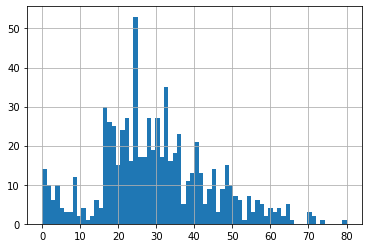

In [14]:
df['Age'].dropna().astype(int).hist(bins=70)

In [15]:
df['Age'][df['Age'].isnull()] = rand

In [16]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

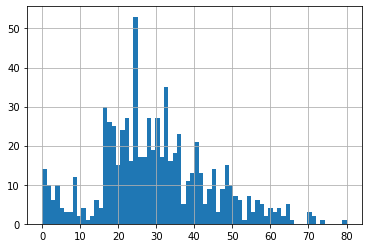

In [17]:
df['Age'].astype(int).hist(bins=70)

### 7.前の値で補完 （時系列データでよく利用される）

In [18]:
df[['Sex']].head()

,Sex
0,male
1,female
3,female
4,male
6,male


In [19]:
df[['Sex']].fillna(method='ffill').head()

,Sex
0,male
1,female
3,female
4,male
6,male


### 8.ダミー変数へ変換　male=0 fmale=1 に変換

In [20]:
df[['Sex']].head()

,Sex
0,male
1,female
3,female
4,male
6,male


In [21]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
3,1,0
4,0,1
6,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [22]:
pd.get_dummies(df['Sex']).drop('male', axis=1)

,female
0,0
1,1
3,1
4,0
6,0
...,...
885,1
886,0
887,1
889,0


### 9.min-max scaling 0~1で正規化

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
mmscaler = MinMaxScaler(copy=True)

In [25]:
lim_min, lim_max = df['Age'].min(), df['Age'].max()

In [26]:
lim_min, lim_max

(0.42, 80.0)

In [27]:
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1,1))

MinMaxScaler()

In [28]:
mmscaler.transform(df[['Age']]).min()

0.0

### 10.標準化

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()

In [31]:
ss.fit_transform(df[['Age']]).std()

1.0

### 主成分分析（標準化）

In [32]:
df_wine = pd.read_csv('wine.csv')

In [33]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
_dfs = ss.fit_transform(df_wine.iloc[:,1:])

In [36]:
dfs = pd.DataFrame(_dfs, columns=df_wine.columns[1:])

In [37]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [53]:
dfs.shape

(178, 13)

### 12.主成分分析（変換）

In [39]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()
pca.fit(dfs)

PCA()

In [42]:
feature = pca.transform(dfs)

In [51]:
feature = pd.DataFrame(feature, columns=['PC{}'.format(x+1) for x in range(len(dfs.columns))])
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [54]:
feature.shape

(178, 13)

### 13.主成分分析（プロット）

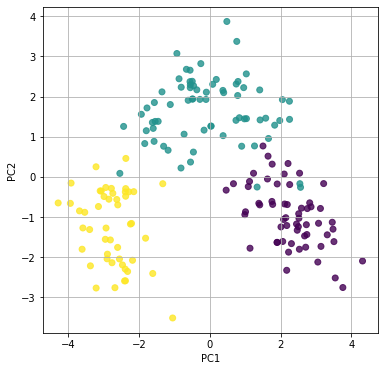

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(feature['PC1'], feature['PC2'], alpha=0.8, c=df_wine['class'])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### ロジスティク回帰（データ分割）

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
x = feature.iloc[:, :2]

In [63]:
y = df_wine.iloc[:, 0]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [68]:
x_train.shape

(142, 2)

In [69]:
x_test.shape

(36, 2)

In [70]:
y_train.shape

(142,)

In [71]:
y_test.shape

(36,)

### ロジスティク回帰（モデルの学習）

In [73]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

### ロジスティク回帰（性能評価）

In [81]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 3], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9166666666666666

In [80]:
np.array(y_test).reshape(1,-1)

array([[1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
        1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3]], dtype=int64)

### k-近傍法

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knc = KNeighborsClassifier(n_neighbors=40)

In [94]:
knc.fit(x_train, y_train) # 学習

KNeighborsClassifier(n_neighbors=40)

In [95]:
y_pred = knc.predict(x_test)
y_pred

array([1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 3], dtype=int64)

In [96]:
knc.score(x_test, y_test)

0.9444444444444444

### 18.重回帰分析（学習用データの準備）

In [100]:
df_slump = pd.read_csv('slump.csv')

In [101]:
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [103]:
x = df_slump.iloc[:, :-1]
y = df_slump.iloc[:, -1]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

In [106]:
x_train.shape

(61, 7)

In [107]:
x_test.shape

(42, 7)

In [110]:
y_test.shape

(42,)

In [109]:
y_test.shape

(42,)

### 19.重回帰分析（モデルの学習）

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
regresser = LinearRegression()
regresser.fit(x_train, y_train)

LinearRegression()

### 20.重回帰分析（モデルの評価）

In [113]:
from sklearn.metrics import r2_score, mean_squared_error

In [114]:
y_pred = regresser.predict(x_test)

In [119]:
r2_score(y_test, y_pred) # 決定係数

0.8404744145704346

In [120]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.976938142530302